**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from  ExchangeEcon import ExchangeEcon
model = ExchangeEcon()

### 2.1. <a id='toc2_1_'></a>[Illustrating $\mathcal{C}$ in an Edgeworth Box](#toc0_)

We employ the method FindCore() to find the set of all pareto-improving allocations, $\mathcal{C}$.

The set of pareto-improving allocations is the plotted using the method PlotCore().

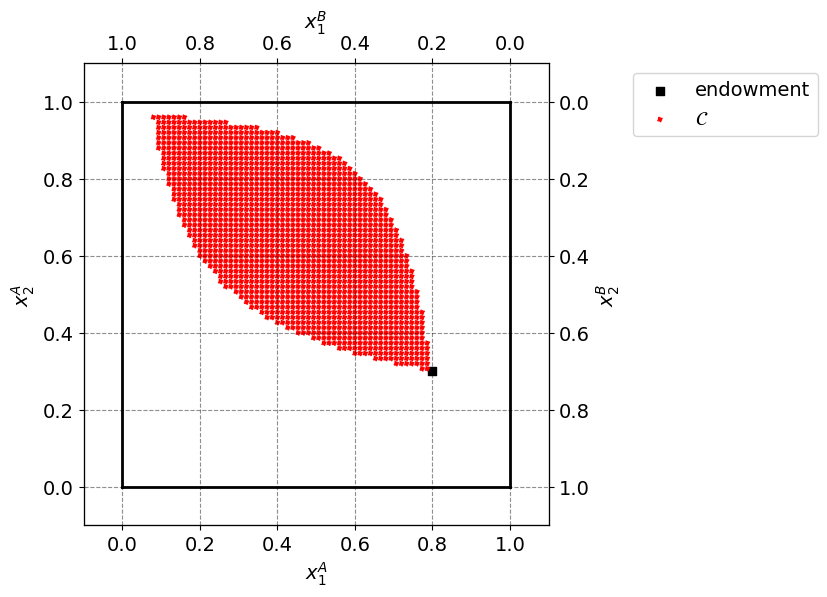

In [3]:
x_core, y_core, core = model.FindCore() ; model.PlotCore(x_core,y_core)

### 2.2. <a id='toc2_1_'></a>[Error in market clearing conditions with discrete set of prices](#toc0_)

We calculate the market error for every price of good 1 in $\mathcal{P}_1$ using the method FindError(). The results are shown in the plot. We also calculate the price that produce the smallest market clearing error.

The smallest market clearing error is (eps1,eps2) = (-0.006,0.005)
The prices that has the smallest market clearing error is 0.953


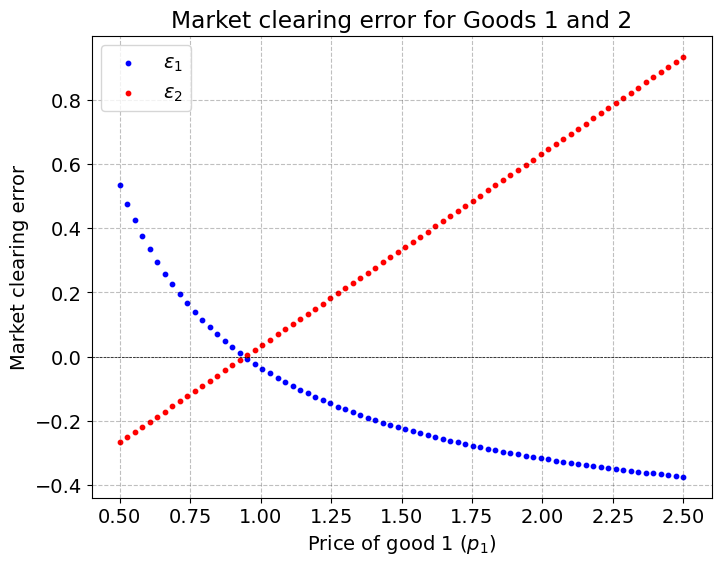

In [4]:
DiscPrices,eps1,eps2 = model.FindError()

### 2.3. <a id='toc2_1_'></a>[Solving for the market clearing price](#toc0_)

To find the market clearing price we employ the method ClearingPrice(), which solves for the price that satisfies the market clearing demands.

In [5]:
ClearPrice = model.ClearingPrice(1)

The market clearing price for good 1: 0.944
Value of the market clearing condition for the market of good 1: -0.000
Value of the market clearing condition for the market of good 2: 0.000
The allocation they would end with would be (x1A,x2A) = (0.37,0.70)
Utility of consumer A in equlibrium is 0.569 and for consumer B it is 0.489


### 2.4.a <a id='toc2_1_'></a>[Consumer A sets price of good 1 from a discrete set of values](#toc0_)

To find the price that consumer A would set if he had to stay within the boundaries of $\mathcal{P}_1$ we employ the method SolveADiscrete(). The method maximizes consumer A's utility given the demand of consumer B at given price of good 1  in $\mathcal{P}_1$.

In [6]:
DiscPriceConsA = model.SolveADiscrete()

The price of good 1 that consumer A would choose: 1.887
The allocation they would end with would be (x1A,x2A) = (0.62,0.64)
Utility of consumer A at their chosen price is 0.634 and for consumer B it is 0.373


### 2.4.b <a id='toc2_1_'></a>[Consumer A sets price of good 1 from any positive non-zero value](#toc0_)

To find the price that consumer A would set if the only restriction is $p_1 \geq 0$ we employ the method SolveAContinous(). The method maximizes consumer A's utility using a bounded optimizer from SciPy.

In [7]:
ContPriceConsA = model.SolveAContinous()

The price of good 1 that consumer A would choose: 1.899
The allocation they would end with would be (x1A,x2A) = (0.62,0.64)
Utility of consumer A at their chosen price is 0.634 and for consumer B it is 0.373


### 2.5.a <a id='toc2_1_'></a>[Consumer A maximizes their utility from any $(x_1^A,x_2^A)\in \mathcal{C}$](#toc0_)

To find the allocation that maximizes A's utility under the constraint that $(x_1^A,x_2^A)\in \mathcal{C}$ we employ the method MaxUtilACore(). This method simply loops through all the allocations that are in the set $\mathcal{C}$ and chooses the one that amounts to the largest utility for A.

In [8]:
DiscMaxx1,DiscMaxx2 = model.MaxUtilACore(core)

Consumer A chooses the allocation (x1A,x2A) = (0.56,0.85)
Utility of consumer A at this allocation is 0.742 and for consumer B it is 0.305


### 2.5.b <a id='toc2_1_'></a>[Consumer A maximizes their utility under the condition that the allocation is pareto-improving](#toc0_)

To find the allocation that maximizes A's utility under the condition that the allocation must be paretoimproving we empoyt the method MaxUtilParetoImp(). The method uses a bounded and constrained optimizer to maximize the utility of consumer A.

In [9]:
ParMaxx1,ParMaxx2 = model.MaxUtilParetoImp()

Consumer A chooses the allocation (x1A,x2A) = (0.58,0.84)
Utility of consumer A at this allocation is 0.743 and for consumer B it is 0.304


### 2.6.a <a id='toc2_1_'></a>[Social planner maximizes total utility](#toc0_)

To find the allocation that the social planner would choose we employ the method SocialPlanner(). This method uses a bounded optimizer to maximize the total utility of consumer A and B.

In [10]:
Socx1,Socx2 = model.SocialPlanner()

The social planner chooses the allocation (x1A,x2A) = (0.333,0.667)
Utility of consumer A at this allocation is 0.529 and for consumer B it is 0.529
Total utility becomes 1.058


### 2.6.a <a id='toc2_1_'></a>[Plotting and discussion of results from question (2.3)-(2.6)](#toc0_)

To illustrate the social planners optimum we find the indifference curves for consumer A and B through that omptimal allocation using the method FindIndifferece(). We then plot those indifference curves in the Edgeworth box.

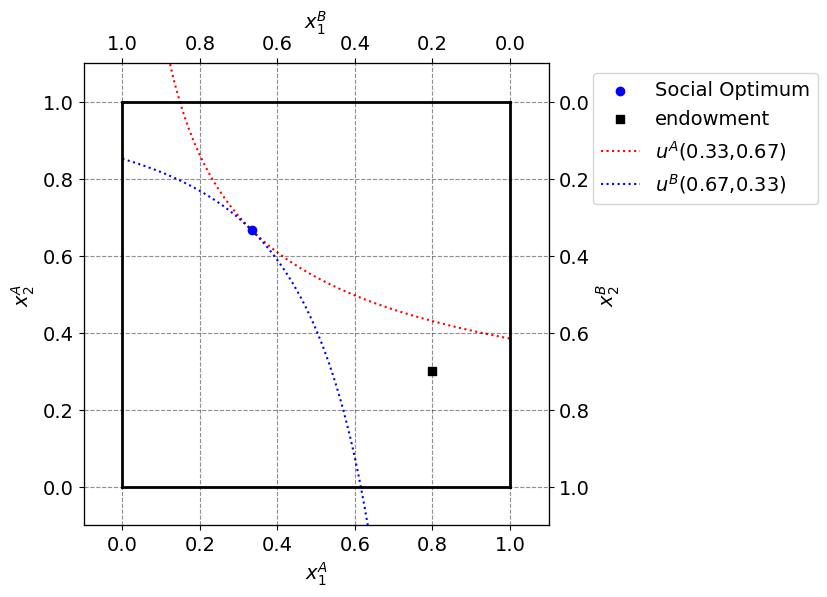

In [11]:
x1vec,x2Avec,x2Bvec = model.FindIndifference(Socx1,Socx2)
model.PlotSocialPlannerEq(x1vec,x2Avec,x2Bvec,Socx1,Socx2)

### 2.7 <a id='toc2_1_'></a>[Drawing a random set of endowments](#toc0_)

We may simply draw a 50 x 2 array of initial endowments.

In [12]:
W = np.random.uniform(0,1,(50,2))

### 2.8 <a id='toc2_1_'></a>[Plotting something](#toc0_)

We don't really get what is supposed to be done in this? Please write down any suggestions.